In [1]:
!pip install --upgrade ta

In [2]:
from config import API_KEY
import pandas as pd,plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "svg"
import sweetviz as sv
import plotly.express as px

from ta.trend import MACD as md
import pandas as pd
import ta
from ta.utils import dropna


Obtaining Data

In [3]:
# Data Collection
from tiingo import TiingoClient
from datetime import datetime, timedelta

config = {
    'api_key': API_KEY,
    'session': True  # Use requests.Session
}
client = TiingoClient(config)

# Calculate the start date as today's date minus 2 years
end_date = datetime.now()
start_date = end_date - timedelta(days=10*365)

# Convert dates to string format
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

df = client.get_dataframe('MSFT', frequency='daily',startDate=start_date_str, endDate=end_date_str)

df.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2014-02-27 00:00:00+00:00,37.86,37.8900,37.230,37.45,33903400,32.063020,32.088426,31.529483,31.715797,33903400,0.0,1.0
2014-02-28 00:00:00+00:00,38.31,38.4600,37.820,37.98,41215000,32.444117,32.571150,32.029144,32.164646,41215000,0.0,1.0
2014-03-03 00:00:00+00:00,37.78,38.1300,37.495,37.92,29717500,31.995269,32.291678,31.753907,32.113833,29717500,0.0,1.0
2014-03-04 00:00:00+00:00,38.41,38.4800,38.070,38.20,26802400,32.528806,32.588088,32.240865,32.350960,26802400,0.0,1.0
2014-03-05 00:00:00+00:00,38.11,38.2699,37.930,38.25,20520100,32.274741,32.410157,32.122301,32.393304,20520100,0.0,1.0


In [4]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'new_index'}, inplace=True)  # Rename the old index column
df['date'] = df['date'].dt.date  # Extract the date part from the datetime index
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2014-02-27,37.86,37.8900,37.230,37.45,33903400,32.063020,32.088426,31.529483,31.715797,33903400,0.0,1.0
1,2014-02-28,38.31,38.4600,37.820,37.98,41215000,32.444117,32.571150,32.029144,32.164646,41215000,0.0,1.0
2,2014-03-03,37.78,38.1300,37.495,37.92,29717500,31.995269,32.291678,31.753907,32.113833,29717500,0.0,1.0
3,2014-03-04,38.41,38.4800,38.070,38.20,26802400,32.528806,32.588088,32.240865,32.350960,26802400,0.0,1.0
4,2014-03-05,38.11,38.2699,37.930,38.25,20520100,32.274741,32.410157,32.122301,32.393304,20520100,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2024-02-16,404.06,408.2900,403.440,407.96,22296495,404.060000,408.290000,403.440000,407.960000,22296495,0.0,1.0
2511,2024-02-20,402.79,404.4900,398.010,403.24,24307915,402.790000,404.490000,398.010000,403.240000,24307915,0.0,1.0
2512,2024-02-21,402.18,402.2900,397.220,400.17,18631072,402.180000,402.290000,397.220000,400.170000,18631072,0.0,1.0
2513,2024-02-22,411.65,412.8300,408.570,410.19,27009869,411.650000,412.830000,408.570000,410.190000,27009869,0.0,1.0


Exploratory Analysis

Removing Columns

In [5]:
# Removing 'Dividends' and 'Stock Splits' columns
df = df.drop(['divCash', 'splitFactor','close','high','low', 'open', 'volume'], axis = 1)
# See results
df

,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,2014-02-27,32.063020,32.088426,31.529483,31.715797,33903400
1,2014-02-28,32.444117,32.571150,32.029144,32.164646,41215000
2,2014-03-03,31.995269,32.291678,31.753907,32.113833,29717500
3,2014-03-04,32.528806,32.588088,32.240865,32.350960,26802400
4,2014-03-05,32.274741,32.410157,32.122301,32.393304,20520100
...,...,...,...,...,...,...
2510,2024-02-16,404.060000,408.290000,403.440000,407.960000,22296495
2511,2024-02-20,402.790000,404.490000,398.010000,403.240000,24307915
2512,2024-02-21,402.180000,402.290000,397.220000,400.170000,18631072
2513,2024-02-22,411.650000,412.830000,408.570000,410.190000,27009869


In [6]:
# # # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
# df_predict = df.tail(506)
# # See results
# df_predict


# Calculate MACD
macd_indicator = ta.trend.MACD(close=df['adjClose'], window_slow=26, window_fast=12, window_sign=9)

# Add MACD line to dataframe
df['MACD'] = macd_indicator.macd()

# Add MACD signal line to dataframe
df['MACD_signal'] = macd_indicator.macd_signal()

# Add MACD histogram to dataframe
df['MACD_histogram'] = macd_indicator.macd_diff()

# Display the updated dataframe
df

,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,MACD,MACD_signal,MACD_histogram
0,2014-02-27,32.063020,32.088426,31.529483,31.715797,33903400,NaN,NaN,NaN
1,2014-02-28,32.444117,32.571150,32.029144,32.164646,41215000,NaN,NaN,NaN
2,2014-03-03,31.995269,32.291678,31.753907,32.113833,29717500,NaN,NaN,NaN
3,2014-03-04,32.528806,32.588088,32.240865,32.350960,26802400,NaN,NaN,NaN
4,2014-03-05,32.274741,32.410157,32.122301,32.393304,20520100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2510,2024-02-16,404.060000,408.290000,403.440000,407.960000,22296495,6.023724,7.528737,-1.505013
2511,2024-02-20,402.790000,404.490000,398.010000,403.240000,24307915,5.212936,7.065577,-1.852641
2512,2024-02-21,402.180000,402.290000,397.220000,400.170000,18631072,4.469636,6.546389,-2.076753
2513,2024-02-22,411.650000,412.830000,408.570000,410.190000,27009869,4.591784,6.155468,-1.563684


In [6]:
# # # Removing last 2 years from the original dataframe
# df.drop(df_predict.index,inplace = True)
# # See results
# df

In [7]:
# Removing NaN
df.dropna(inplace=True)
# See Results
df

,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,MACD,MACD_signal,MACD_histogram
33,2014-04-15,33.663630,33.841476,33.070811,33.316408,33968700,0.176380,0.365218,-0.188838
34,2014-04-16,34.214104,34.226808,33.794897,33.926164,30615800,0.203479,0.332870,-0.129391
35,2014-04-17,33.883820,34.040493,33.460378,33.883820,36689400,0.196044,0.305505,-0.109461
36,2014-04-21,33.824538,34.002383,33.697505,33.985446,22221200,0.183255,0.281055,-0.097800
37,2014-04-22,33.866882,33.993915,33.731381,33.841476,27056700,0.174525,0.259749,-0.085224
...,...,...,...,...,...,...,...,...,...
2510,2024-02-16,404.060000,408.290000,403.440000,407.960000,22296495,6.023724,7.528737,-1.505013
2511,2024-02-20,402.790000,404.490000,398.010000,403.240000,24307915,5.212936,7.065577,-1.852641
2512,2024-02-21,402.180000,402.290000,397.220000,400.170000,18631072,4.469636,6.546389,-2.076753
2513,2024-02-22,411.650000,412.830000,408.570000,410.190000,27009869,4.591784,6.155468,-1.563684


In [8]:
# Removing NaN
df.dropna(inplace=True)

# Create an RSI indicator instance using the adjusted close column
rsi_indicator = ta.momentum.RSIIndicator(close=df['adjClose'], window=14)

# Calculate the RSI and add it to the dataframe
df['RSI'] = rsi_indicator.rsi()
df

,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,MACD,MACD_signal,MACD_histogram,RSI
33,2014-04-15,33.663630,33.841476,33.070811,33.316408,33968700,0.176380,0.365218,-0.188838,NaN
34,2014-04-16,34.214104,34.226808,33.794897,33.926164,30615800,0.203479,0.332870,-0.129391,NaN
35,2014-04-17,33.883820,34.040493,33.460378,33.883820,36689400,0.196044,0.305505,-0.109461,NaN
36,2014-04-21,33.824538,34.002383,33.697505,33.985446,22221200,0.183255,0.281055,-0.097800,NaN
37,2014-04-22,33.866882,33.993915,33.731381,33.841476,27056700,0.174525,0.259749,-0.085224,NaN
...,...,...,...,...,...,...,...,...,...,...
2510,2024-02-16,404.060000,408.290000,403.440000,407.960000,22296495,6.023724,7.528737,-1.505013,52.966283
2511,2024-02-20,402.790000,404.490000,398.010000,403.240000,24307915,5.212936,7.065577,-1.852641,51.746014
2512,2024-02-21,402.180000,402.290000,397.220000,400.170000,18631072,4.469636,6.546389,-2.076753,51.136619
2513,2024-02-22,411.650000,412.830000,408.570000,410.190000,27009869,4.591784,6.155468,-1.563684,59.174759


<AxesSubplot: >

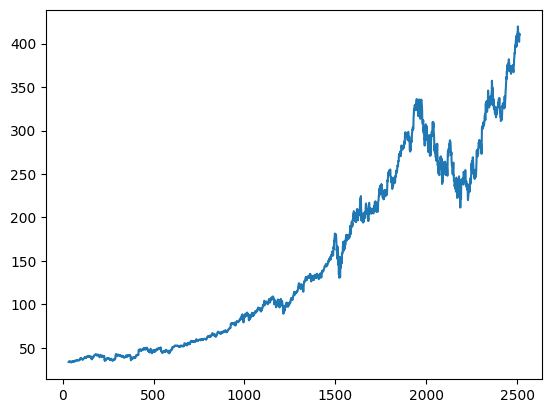

In [9]:
df.adjClose.plot()

In [10]:
# Calculate the differences for every column except for the RSI column
df_diff = df.drop(columns=['RSI','MACD_histogram', 'MACD', 'MACD_signal']).diff().dropna()

# Calculate the RSI using the adjusted close column
rsi_indicator = ta.momentum.RSIIndicator(close=df['adjClose'], window=14)
df['RSI'] = rsi_indicator.rsi()

# Concatenate the differenced data with the RSI column
diffs = pd.concat([df_diff, df[['RSI','MACD_histogram', 'MACD_signal','MACD']]], axis=1)

# Display the resulting dataframe
print(diffs)

                 date  adjClose    adjHigh     adjLow    adjOpen   adjVolume  \
34     1 day, 0:00:00  0.550474   0.385332   0.724086   0.609756  -3352900.0   
35     1 day, 0:00:00 -0.330285  -0.186314  -0.334519  -0.042344   6073600.0   
36    4 days, 0:00:00 -0.059282  -0.038110   0.237127   0.101626 -14468200.0   
37     1 day, 0:00:00  0.042344  -0.008469   0.033875  -0.143970   4835500.0   
38     1 day, 0:00:00 -0.254065  -0.127033  -0.304878   0.025407  -2453900.0   
...               ...       ...        ...        ...        ...         ...   
2511  4 days, 0:00:00 -1.270000  -3.800000  -5.430000  -4.720000   2011420.0   
2512   1 day, 0:00:00 -0.610000  -2.200000  -0.790000  -3.070000  -5676843.0   
2513   1 day, 0:00:00  9.470000  10.540000  11.350000  10.020000   8378797.0   
2514   1 day, 0:00:00 -1.310000   3.030000   0.400000   5.480000 -10713990.0   
33                NaN       NaN        NaN        NaN        NaN         NaN   

            RSI  MACD_histogram  MACD_s

In [21]:
# diffs= df.diff()

<AxesSubplot: >

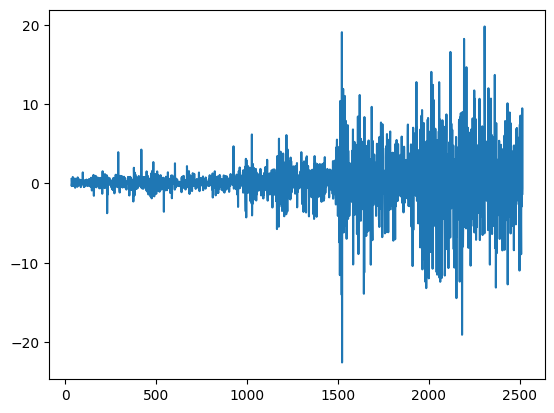

In [11]:
diffs.adjClose.plot()

In [12]:
diffs.corr()

,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD_histogram,MACD_signal,MACD
adjClose,1.000000,0.687509,0.695274,0.278952,-0.046700,0.269357,0.168820,-0.002248,0.050647
adjHigh,0.687509,1.000000,0.720687,0.694314,0.095679,0.289985,0.230125,0.012087,0.083203
adjLow,0.695274,0.720687,1.000000,0.707372,-0.156711,0.287114,0.226442,0.002395,0.072993
adjOpen,0.278952,0.694314,0.707372,1.000000,-0.030911,0.240727,0.231385,0.014264,0.085632
adjVolume,-0.046700,0.095679,-0.156711,-0.030911,1.000000,-0.015018,-0.007891,0.007479,0.004526
RSI,0.269357,0.289985,0.287114,0.240727,-0.015018,1.000000,0.505043,0.493102,0.618770
MACD_histogram,0.168820,0.230125,0.226442,0.231385,-0.007891,0.505043,1.000000,0.048964,0.358225
MACD_signal,-0.002248,0.012087,0.002395,0.014264,0.007479,0.493102,0.048964,1.000000,0.950056
MACD,0.050647,0.083203,0.072993,0.085632,0.004526,0.618770,0.358225,0.950056,1.000000


In [13]:
# Assuming your data is sorted by time
# Create a lag feature to represent the previous values
for i in range(1, 6):  # Assuming you want to use the first 15 points to predict the next one
    diffs[f'lag_{i}'] = diffs['adjClose'].shift(i)


In [14]:
diffs.head(10)

,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5
34,"1 day, 0:00:00",0.550474,0.385332,0.724086,0.609756,-3352900.0,NaN,-0.129391,0.332870,0.203479,NaN,NaN,NaN,NaN,NaN
35,"1 day, 0:00:00",-0.330285,-0.186314,-0.334519,-0.042344,6073600.0,NaN,-0.109461,0.305505,0.196044,0.550474,NaN,NaN,NaN,NaN
36,"4 days, 0:00:00",-0.059282,-0.038110,0.237127,0.101626,-14468200.0,NaN,-0.097800,0.281055,0.183255,-0.330285,0.550474,NaN,NaN,NaN
37,"1 day, 0:00:00",0.042344,-0.008469,0.033875,-0.143970,4835500.0,NaN,-0.085224,0.259749,0.174525,-0.059282,-0.330285,0.550474,NaN,NaN
38,"1 day, 0:00:00",-0.254065,-0.127033,-0.304878,0.025407,-2453900.0,NaN,-0.091456,0.236885,0.145429,0.042344,-0.059282,-0.330285,0.550474,NaN
39,"1 day, 0:00:00",0.143970,-0.016938,-0.143970,-0.211721,17778800.0,NaN,-0.083539,0.216000,0.132461,-0.254065,0.042344,-0.059282,-0.330285,0.550474
40,"1 day, 0:00:00",0.042344,0.601287,0.381098,0.465786,14495200.0,NaN,-0.073465,0.197634,0.124168,0.143970,-0.254065,0.042344,-0.059282,-0.330285
41,"3 days, 0:00:00",0.813008,0.516599,0.287940,-0.127033,-6266600.0,NaN,-0.013217,0.194329,0.181112,0.042344,0.143970,-0.254065,0.042344,-0.059282
42,"1 day, 0:00:00",-0.304878,-0.084688,0.254065,0.813008,-20974000.0,NaN,0.004010,0.195332,0.199341,0.813008,0.042344,0.143970,-0.254065,0.042344
43,"1 day, 0:00:00",-0.093157,-0.584350,-0.186399,-0.592819,5822500.0,NaN,0.006871,0.197050,0.203921,-0.304878,0.813008,0.042344,0.143970,-0.254065


In [15]:
diffs['date'] = df['date']
diffs

,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5
34,2014-04-16,0.550474,0.385332,0.724086,0.609756,-3352900.0,NaN,-0.129391,0.332870,0.203479,NaN,NaN,NaN,NaN,NaN
35,2014-04-17,-0.330285,-0.186314,-0.334519,-0.042344,6073600.0,NaN,-0.109461,0.305505,0.196044,0.550474,NaN,NaN,NaN,NaN
36,2014-04-21,-0.059282,-0.038110,0.237127,0.101626,-14468200.0,NaN,-0.097800,0.281055,0.183255,-0.330285,0.550474,NaN,NaN,NaN
37,2014-04-22,0.042344,-0.008469,0.033875,-0.143970,4835500.0,NaN,-0.085224,0.259749,0.174525,-0.059282,-0.330285,0.550474,NaN,NaN
38,2014-04-23,-0.254065,-0.127033,-0.304878,0.025407,-2453900.0,NaN,-0.091456,0.236885,0.145429,0.042344,-0.059282,-0.330285,0.550474,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-02-20,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,-1.852641,7.065577,5.212936,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
2512,2024-02-21,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,51.136619,-2.076753,6.546389,4.469636,-1.270000,-2.500000,-2.930000,3.912833,-8.923656
2513,2024-02-22,9.470000,10.540000,11.350000,10.020000,8378797.0,59.174759,-1.563684,6.155468,4.591784,-0.610000,-1.270000,-2.500000,-2.930000,3.912833
2514,2024-02-23,-1.310000,3.030000,0.400000,5.480000,-10713990.0,57.759292,-1.299851,5.830505,4.530654,9.470000,-0.610000,-1.270000,-2.500000,-2.930000


In [16]:
# diffs = diffs.drop(0)
diffs

,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5
34,2014-04-16,0.550474,0.385332,0.724086,0.609756,-3352900.0,NaN,-0.129391,0.332870,0.203479,NaN,NaN,NaN,NaN,NaN
35,2014-04-17,-0.330285,-0.186314,-0.334519,-0.042344,6073600.0,NaN,-0.109461,0.305505,0.196044,0.550474,NaN,NaN,NaN,NaN
36,2014-04-21,-0.059282,-0.038110,0.237127,0.101626,-14468200.0,NaN,-0.097800,0.281055,0.183255,-0.330285,0.550474,NaN,NaN,NaN
37,2014-04-22,0.042344,-0.008469,0.033875,-0.143970,4835500.0,NaN,-0.085224,0.259749,0.174525,-0.059282,-0.330285,0.550474,NaN,NaN
38,2014-04-23,-0.254065,-0.127033,-0.304878,0.025407,-2453900.0,NaN,-0.091456,0.236885,0.145429,0.042344,-0.059282,-0.330285,0.550474,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2024-02-20,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,-1.852641,7.065577,5.212936,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
2512,2024-02-21,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,51.136619,-2.076753,6.546389,4.469636,-1.270000,-2.500000,-2.930000,3.912833,-8.923656
2513,2024-02-22,9.470000,10.540000,11.350000,10.020000,8378797.0,59.174759,-1.563684,6.155468,4.591784,-0.610000,-1.270000,-2.500000,-2.930000,3.912833
2514,2024-02-23,-1.310000,3.030000,0.400000,5.480000,-10713990.0,57.759292,-1.299851,5.830505,4.530654,9.470000,-0.610000,-1.270000,-2.500000,-2.930000


In [17]:
diffs.dropna()

,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5
46,2014-05-05,-0.220190,-0.592903,-0.304878,-0.669038,-20955700.0,40.190478,-0.079622,0.161713,0.082092,-0.262534,-0.338754,-0.093157,-0.304878,0.813008
47,2014-05-06,-0.313347,-0.245512,-0.296409,-0.194783,4651500.0,35.037006,-0.117608,0.132311,0.014703,-0.220190,-0.262534,-0.338754,-0.093157,-0.304878
48,2014-05-07,0.309113,0.135501,-0.372629,-0.059282,14632100.0,42.825523,-0.116732,0.103128,-0.013604,-0.313347,-0.220190,-0.262534,-0.338754,-0.093157
49,2014-05-08,0.182080,0.330285,0.389567,0.101626,-9624100.0,46.866509,-0.099384,0.078282,-0.021102,0.309113,-0.313347,-0.220190,-0.262534,-0.338754
50,2014-05-09,-0.084688,-0.042344,0.338754,0.169377,-2472800.0,45.264058,-0.089419,0.055928,-0.033491,0.182080,0.309113,-0.313347,-0.220190,-0.262534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2510,2024-02-16,-2.500000,-0.840000,-0.850000,-0.180000,470970.0,52.966283,-1.505013,7.528737,6.023724,-2.930000,3.912833,-8.923656,-5.280329,6.428226
2511,2024-02-20,-1.270000,-3.800000,-5.430000,-4.720000,2011420.0,51.746014,-1.852641,7.065577,5.212936,-2.500000,-2.930000,3.912833,-8.923656,-5.280329
2512,2024-02-21,-0.610000,-2.200000,-0.790000,-3.070000,-5676843.0,51.136619,-2.076753,6.546389,4.469636,-1.270000,-2.500000,-2.930000,3.912833,-8.923656
2513,2024-02-22,9.470000,10.540000,11.350000,10.020000,8378797.0,59.174759,-1.563684,6.155468,4.591784,-0.610000,-1.270000,-2.500000,-2.930000,3.912833


In [18]:
import numpy as np
diffs['target'] =np.where(diffs.adjClose >=0 ,1,0 )
diffs.head()

,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,target
34,2014-04-16,0.550474,0.385332,0.724086,0.609756,-3352900.0,NaN,-0.129391,0.332870,0.203479,NaN,NaN,NaN,NaN,NaN,1
35,2014-04-17,-0.330285,-0.186314,-0.334519,-0.042344,6073600.0,NaN,-0.109461,0.305505,0.196044,0.550474,NaN,NaN,NaN,NaN,0
36,2014-04-21,-0.059282,-0.038110,0.237127,0.101626,-14468200.0,NaN,-0.097800,0.281055,0.183255,-0.330285,0.550474,NaN,NaN,NaN,0
37,2014-04-22,0.042344,-0.008469,0.033875,-0.143970,4835500.0,NaN,-0.085224,0.259749,0.174525,-0.059282,-0.330285,0.550474,NaN,NaN,1
38,2014-04-23,-0.254065,-0.127033,-0.304878,0.025407,-2453900.0,NaN,-0.091456,0.236885,0.145429,0.042344,-0.059282,-0.330285,0.550474,NaN,0


In [19]:
diffs.columns

Index(['date', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'RSI',
       'MACD_histogram', 'MACD_signal', 'MACD', 'lag_1', 'lag_2', 'lag_3',
       'lag_4', 'lag_5', 'target'],
      dtype='object')

In [105]:
adjClose_df = diffs[['adjClose', 'date', 'RSI']].dropna(inplace=True)

In [20]:
diffs.drop(['date','adjClose', 'adjHigh', 'adjLow','adjVolume'],axis=1,inplace=True)
diffs.head()


,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,target
34,0.609756,NaN,-0.129391,0.332870,0.203479,NaN,NaN,NaN,NaN,NaN,1
35,-0.042344,NaN,-0.109461,0.305505,0.196044,0.550474,NaN,NaN,NaN,NaN,0
36,0.101626,NaN,-0.097800,0.281055,0.183255,-0.330285,0.550474,NaN,NaN,NaN,0
37,-0.143970,NaN,-0.085224,0.259749,0.174525,-0.059282,-0.330285,0.550474,NaN,NaN,1
38,0.025407,NaN,-0.091456,0.236885,0.145429,0.042344,-0.059282,-0.330285,0.550474,NaN,0


In [21]:
diffs.dropna(inplace=True)

In [22]:
diffs.head()

,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,target
46,-0.669038,40.190478,-0.079622,0.161713,0.082092,-0.262534,-0.338754,-0.093157,-0.304878,0.813008,0
47,-0.194783,35.037006,-0.117608,0.132311,0.014703,-0.220190,-0.262534,-0.338754,-0.093157,-0.304878,0
48,-0.059282,42.825523,-0.116732,0.103128,-0.013604,-0.313347,-0.220190,-0.262534,-0.338754,-0.093157,1
49,0.101626,46.866509,-0.099384,0.078282,-0.021102,0.309113,-0.313347,-0.220190,-0.262534,-0.338754,1
50,0.169377,45.264058,-0.089419,0.055928,-0.033491,0.182080,0.309113,-0.313347,-0.220190,-0.262534,0


In [23]:
# # Creating a new dataframe containing the last 2 years data to later test how well our predicting model will compare to the closing prices
df_predict = diffs.tail(506)
# See results
df_predict



,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,target
2009,-1.969166,39.349829,-0.180036,-4.405549,-4.585584,-0.343035,5.361140,-0.039204,-7.193925,-8.654272,0
2010,-3.250842,37.726732,-0.603973,-4.556542,-5.160514,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,0
2011,-7.906127,37.601461,-0.809648,-4.758954,-5.568602,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,0
2012,5.087421,33.368352,-1.319676,-5.088873,-6.408549,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,0
2013,-17.354195,45.961385,-0.626242,-5.245433,-5.871675,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,1
...,...,...,...,...,...,...,...,...,...,...,...
2510,-0.180000,52.966283,-1.505013,7.528737,6.023724,-2.930000,3.912833,-8.923656,-5.280329,6.428226,0
2511,-4.720000,51.746014,-1.852641,7.065577,5.212936,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0
2512,-3.070000,51.136619,-2.076753,6.546389,4.469636,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,0
2513,10.020000,59.174759,-1.563684,6.155468,4.591784,-0.610000,-1.270000,-2.500000,-2.930000,3.912833,1


In [24]:
# # Removing last 2 years from the original dataframe
diffs.drop(df_predict.index,inplace = True)
# See results
diffs

,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,target
46,-0.669038,40.190478,-0.079622,0.161713,0.082092,-0.262534,-0.338754,-0.093157,-0.304878,0.813008,0
47,-0.194783,35.037006,-0.117608,0.132311,0.014703,-0.220190,-0.262534,-0.338754,-0.093157,-0.304878,0
48,-0.059282,42.825523,-0.116732,0.103128,-0.013604,-0.313347,-0.220190,-0.262534,-0.338754,-0.093157,1
49,0.101626,46.866509,-0.099384,0.078282,-0.021102,0.309113,-0.313347,-0.220190,-0.262534,-0.338754,1
50,0.169377,45.264058,-0.089419,0.055928,-0.033491,0.182080,0.309113,-0.313347,-0.220190,-0.262534,0
...,...,...,...,...,...,...,...,...,...,...,...
2004,-5.709075,45.016914,1.204787,-4.643183,-3.438395,6.517656,3.538156,-4.890693,4.596663,-11.967005,0
2005,-0.833084,40.659095,0.518854,-4.513469,-3.994615,-8.654272,6.517656,3.538156,-4.890693,4.596663,0
2006,-9.232530,40.636009,0.100371,-4.488376,-4.388005,-7.193925,-8.654272,6.517656,3.538156,-4.890693,0
2007,6.113856,45.216939,0.215868,-4.434409,-4.218541,-0.039204,-7.193925,-8.654272,6.517656,3.538156,1


In [25]:
diffs.iloc[:,:-1]

,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5
46,-0.669038,40.190478,-0.079622,0.161713,0.082092,-0.262534,-0.338754,-0.093157,-0.304878,0.813008
47,-0.194783,35.037006,-0.117608,0.132311,0.014703,-0.220190,-0.262534,-0.338754,-0.093157,-0.304878
48,-0.059282,42.825523,-0.116732,0.103128,-0.013604,-0.313347,-0.220190,-0.262534,-0.338754,-0.093157
49,0.101626,46.866509,-0.099384,0.078282,-0.021102,0.309113,-0.313347,-0.220190,-0.262534,-0.338754
50,0.169377,45.264058,-0.089419,0.055928,-0.033491,0.182080,0.309113,-0.313347,-0.220190,-0.262534
...,...,...,...,...,...,...,...,...,...,...
2004,-5.709075,45.016914,1.204787,-4.643183,-3.438395,6.517656,3.538156,-4.890693,4.596663,-11.967005
2005,-0.833084,40.659095,0.518854,-4.513469,-3.994615,-8.654272,6.517656,3.538156,-4.890693,4.596663
2006,-9.232530,40.636009,0.100371,-4.488376,-4.388005,-7.193925,-8.654272,6.517656,3.538156,-4.890693
2007,6.113856,45.216939,0.215868,-4.434409,-4.218541,-0.039204,-7.193925,-8.654272,6.517656,3.538156


In [26]:
from pycaret.classification import *
s = setup(diffs, target='target', session_id=123)



c:\Users\alyss\anaconda3\envs\pycaret\lib\site-packages\sktime\utils\validation\series.py:21: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\alyss\anaconda3\envs\pycaret\lib\site-packages\sktime\forecasting\base\_fh.py:18: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\alyss\anaconda3\envs\pycaret\lib\site-packages\sktime\forecasting\base\_fh.py:19: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\alyss\anaconda3\envs\pycaret\lib\site-packages\sktime\datatypes\_series\_check.py:43: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

c:\Users\

,Description,Value
0,Session id,123
1,Target,target
2,Target type,classification
3,Data shape,"(1963, 11)"
4,Train data shape,"(1374, 11)"
5,Test data shape,"(589, 11)"
6,Numeric features,10
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [27]:
#  Obtaining top 3 best models
top5 = compare_models(n_select=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7366,0.7990,0.8340,0.7314,0.7784,0.4568,0.4655,1.8960
gbc,Gradient Boosting Classifier,0.7329,0.7919,0.8221,0.7323,0.7737,0.4503,0.4567,0.0780
lightgbm,Light Gradient Boosting Machine,0.7322,0.8034,0.7894,0.7460,0.7661,0.4533,0.4561,0.4360
xgboost,Extreme Gradient Boosting,0.7190,0.7956,0.7802,0.7336,0.7554,0.4261,0.4283,0.0590
et,Extra Trees Classifier,0.7169,0.7762,0.7973,0.7237,0.7580,0.4189,0.4232,0.0700
ada,Ada Boost Classifier,0.7132,0.7694,0.7866,0.7241,0.7535,0.4121,0.4148,0.0400
rf,Random Forest Classifier,0.7111,0.7568,0.7961,0.7177,0.7534,0.4066,0.4133,0.0910
lr,Logistic Regression,0.7001,0.7463,0.7918,0.7065,0.7459,0.3828,0.3879,0.7460
ridge,Ridge Classifier,0.6987,0.0000,0.8036,0.7009,0.7479,0.3776,0.3846,0.0090
lda,Linear Discriminant Analysis,0.6987,0.7446,0.8023,0.7012,0.7475,0.3779,0.3847,0.0100


In [28]:
catboost= create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7101,0.8073,0.7922,0.7176,0.7531,0.4043,0.4072
1,0.7391,0.7675,0.8312,0.7356,0.7805,0.4620,0.4672
2,0.7029,0.7994,0.7532,0.7250,0.7389,0.3946,0.3950
3,0.7609,0.8227,0.8182,0.7683,0.7925,0.5111,0.5125
4,0.7737,0.8279,0.8684,0.7586,0.8098,0.5337,0.5411
5,0.7664,0.8371,0.8553,0.7558,0.8025,0.5194,0.5254
6,0.7591,0.8195,0.8816,0.7363,0.8024,0.5003,0.5137
7,0.7153,0.7349,0.9211,0.6796,0.7821,0.3974,0.4373
8,0.7518,0.8082,0.8553,0.7386,0.7927,0.4877,0.4959
9,0.6861,0.7655,0.7632,0.6988,0.7296,0.3574,0.3593


In [ ]:
# lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5931,0.6448,0.8623,0.5760,0.6906,0.1601,0.1903
1,0.5962,0.6576,0.8683,0.5777,0.6938,0.1663,0.1987
2,0.5868,0.6799,0.8862,0.5692,0.6932,0.1441,0.1814
3,0.5791,0.6473,0.8383,0.5691,0.6780,0.1306,0.1526
4,0.5633,0.6687,0.8563,0.5564,0.6745,0.0943,0.1168
5,0.6108,0.6915,0.9162,0.5840,0.7133,0.1912,0.2448
6,0.5791,0.6260,0.8323,0.5697,0.6764,0.1313,0.1519
7,0.5981,0.6632,0.8323,0.5840,0.6864,0.1723,0.1944
8,0.5728,0.7048,0.8675,0.5603,0.6809,0.1176,0.1463
9,0.5538,0.6103,0.8735,0.5472,0.6729,0.0759,0.0998


In [29]:
# tune_lr = tune_model(lr, n_iter=2000)
tune_catboost = tune_model(catboost, n_iter = 20)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7319,0.8107,0.8312,0.7273,0.7758,0.4461,0.4523
1,0.7464,0.7790,0.8182,0.7500,0.7826,0.4796,0.4823
2,0.7101,0.8105,0.7403,0.7403,0.7403,0.4124,0.4124
3,0.7536,0.8265,0.8052,0.7654,0.7848,0.4971,0.4980
4,0.7810,0.8261,0.8421,0.7805,0.8101,0.5524,0.5546
5,0.7080,0.8477,0.7763,0.7195,0.7468,0.4032,0.4048
6,0.7737,0.8162,0.8684,0.7586,0.8098,0.5337,0.5411
7,0.6934,0.7360,0.8947,0.6667,0.7640,0.3522,0.3844
8,0.7445,0.8175,0.8421,0.7356,0.7853,0.4735,0.4801
9,0.7372,0.8119,0.7895,0.7500,0.7692,0.4646,0.4654


In [34]:

evaluate_model(tune_catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
# final_lr_model = finalize_model(tune_lr)
final_catboost_model = finalize_model(tune_catboost)


KeyboardInterrupt: 

In [ ]:
evaluate_model(rf)

In [ ]:

df_predict

,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,target
2009,-1.969166,39.349829,-0.180036,-4.405549,-4.585584,-0.343035,5.361140,-0.039204,-7.193925,-8.654272,0
2010,-3.250842,37.726732,-0.603973,-4.556542,-5.160514,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,0
2011,-7.906127,37.601461,-0.809648,-4.758954,-5.568602,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,0
2012,5.087421,33.368352,-1.319676,-5.088873,-6.408549,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,0
2013,-17.354195,45.961385,-0.626242,-5.245433,-5.871675,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,1
...,...,...,...,...,...,...,...,...,...,...,...
2510,-0.180000,52.966283,-1.505013,7.528737,6.023724,-2.930000,3.912833,-8.923656,-5.280329,6.428226,0
2511,-4.720000,51.746014,-1.852641,7.065577,5.212936,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0
2512,-3.070000,51.136619,-2.076753,6.546389,4.469636,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,0
2513,10.020000,59.174759,-1.563684,6.155468,4.591784,-0.610000,-1.270000,-2.500000,-2.930000,3.912833,1


In [ ]:
predictions = predict_model(final_catboost_model,
                          data =df_predict)
predictions.head(50)

,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,Label,Score
2009,-1.969166,39.349829,-0.180036,-4.405549,-4.585584,-0.343035,5.361140,-0.039204,-7.193925,-8.654272,0,0.5335
2010,-3.250842,37.726732,-0.603973,-4.556542,-5.160514,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,0,0.7283
2011,-7.906127,37.601461,-0.809648,-4.758954,-5.568602,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,1,0.7205
2012,5.087421,33.368352,-1.319676,-5.088873,-6.408549,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,1,0.6807
2013,-17.354195,45.961385,-0.626242,-5.245433,-5.871675,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,1,0.9692
2014,22.225548,47.972751,0.059521,-5.230553,-5.171032,14.064068,-7.316851,-0.206247,-2.749957,-8.613259,1,0.6472
2015,-0.815166,49.083268,0.626672,-5.073885,-4.447213,2.671387,14.064068,-7.316851,-0.206247,-2.749957,0,0.8560
2016,2.052647,46.320637,0.754877,-4.885166,-4.130288,1.453549,2.671387,14.064068,-7.316851,-0.206247,0,0.7695
2017,-1.021413,50.421433,1.168627,-4.593009,-3.424381,-3.771370,1.453549,2.671387,14.064068,-7.316851,0,0.5143
2018,7.395421,47.253499,1.140939,-4.307774,-3.166835,5.146349,-3.771370,1.453549,2.671387,14.064068,0,0.8234


In [115]:
adjClose_df.dropna(inplace=True)

In [118]:
merged_df = predictions.merge(adjClose_df, on='RSI', how='inner')
merged_df

,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,Label,Score,adjClose,date
0,-1.969166,39.349829,-0.180036,-4.405549,-4.585584,-0.343035,5.361140,-0.039204,-7.193925,-8.654272,0,0.5335,-8.613259,2022-02-17
1,-3.250842,37.726732,-0.603973,-4.556542,-5.160514,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,0,0.7283,-2.749957,2022-02-18
2,-7.906127,37.601461,-0.809648,-4.758954,-5.568602,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,1,0.7205,-0.206247,2022-02-22
3,5.087421,33.368352,-1.319676,-5.088873,-6.408549,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,1,0.6807,-7.316851,2022-02-23
4,-17.354195,45.961385,-0.626242,-5.245433,-5.871675,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,1,0.9692,14.064068,2022-02-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.180000,52.966283,-1.505013,7.528737,6.023724,-2.930000,3.912833,-8.923656,-5.280329,6.428226,0,0.6574,-2.500000,2024-02-16
502,-4.720000,51.746014,-1.852641,7.065577,5.212936,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0,0.6174,-1.270000,2024-02-20
503,-3.070000,51.136619,-2.076753,6.546389,4.469636,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,0,0.6081,-0.610000,2024-02-21
504,10.020000,59.174759,-1.563684,6.155468,4.591784,-0.610000,-1.270000,-2.500000,-2.930000,3.912833,1,0.8315,9.470000,2024-02-22


In [120]:
# Create a new column 'Profit_Loss' and calculate cumulative total
merged_df['Profit_Loss'] = 0  # Initialize the column with zeros
cumulative_total = 0  # Initialize cumulative total

# Apply the logic to calculate profits and losses and update cumulative total
for index, row in merged_df.iterrows():
    if row['Score'] > 0.7:
        merged_df.at[index, 'Profit_Loss'] = row['adjClose']
        cumulative_total += row['adjClose']
    else:
        merged_df.at[index, 'Profit_Loss'] = -row['adjClose']
        cumulative_total -= row['adjClose']
    merged_df.at[index, 'Cumulative_Total'] = cumulative_total

# Display the updated DataFrame
merged_df

,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,Label,Score,adjClose,date,Profit_Loss,Cumulative_Total
0,-1.969166,39.349829,-0.180036,-4.405549,-4.585584,-0.343035,5.361140,-0.039204,-7.193925,-8.654272,0,0.5335,-8.613259,2022-02-17,8.613259,8.613259
1,-3.250842,37.726732,-0.603973,-4.556542,-5.160514,-8.613259,-0.343035,5.361140,-0.039204,-7.193925,0,0.7283,-2.749957,2022-02-18,-2.749957,5.863302
2,-7.906127,37.601461,-0.809648,-4.758954,-5.568602,-2.749957,-8.613259,-0.343035,5.361140,-0.039204,1,0.7205,-0.206247,2022-02-22,-0.206247,5.657055
3,5.087421,33.368352,-1.319676,-5.088873,-6.408549,-0.206247,-2.749957,-8.613259,-0.343035,5.361140,1,0.6807,-7.316851,2022-02-23,7.316851,12.973906
4,-17.354195,45.961385,-0.626242,-5.245433,-5.871675,-7.316851,-0.206247,-2.749957,-8.613259,-0.343035,1,0.9692,14.064068,2022-02-24,14.064068,27.037974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.180000,52.966283,-1.505013,7.528737,6.023724,-2.930000,3.912833,-8.923656,-5.280329,6.428226,0,0.6574,-2.500000,2024-02-16,2.500000,109.537638
502,-4.720000,51.746014,-1.852641,7.065577,5.212936,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0,0.6174,-1.270000,2024-02-20,1.270000,110.807638
503,-3.070000,51.136619,-2.076753,6.546389,4.469636,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,0,0.6081,-0.610000,2024-02-21,0.610000,111.417638
504,10.020000,59.174759,-1.563684,6.155468,4.591784,-0.610000,-1.270000,-2.500000,-2.930000,3.912833,1,0.8315,9.470000,2024-02-22,9.470000,120.887638


In [125]:


merged_df['Cumulative_Total'] = merged_df['Profit_Loss'].cumsum()
merged_df.tail(6)

,adjOpen,RSI,MACD_histogram,MACD_signal,MACD,lag_1,lag_2,lag_3,lag_4,lag_5,Label,Score,adjClose,date,Profit_Loss,Cumulative_Total
500,0.07,55.352256,-1.063334,7.904991,6.841657,3.912833,-8.923656,-5.280329,6.428226,0.059890,0,0.8982,-2.93,2024-02-15,-2.93,107.037638
501,-0.18,52.966283,-1.505013,7.528737,6.023724,-2.930000,3.912833,-8.923656,-5.280329,6.428226,0,0.6574,-2.50,2024-02-16,2.50,109.537638
502,-4.72,51.746014,-1.852641,7.065577,5.212936,-2.500000,-2.930000,3.912833,-8.923656,-5.280329,0,0.6174,-1.27,2024-02-20,1.27,110.807638
503,-3.07,51.136619,-2.076753,6.546389,4.469636,-1.270000,-2.500000,-2.930000,3.912833,-8.923656,0,0.6081,-0.61,2024-02-21,0.61,111.417638
504,10.02,59.174759,-1.563684,6.155468,4.591784,-0.610000,-1.270000,-2.500000,-2.930000,3.912833,1,0.8315,9.47,2024-02-22,9.47,120.887638
505,5.48,57.759292,-1.299851,5.830505,4.530654,9.470000,-0.610000,-1.270000,-2.500000,-2.930000,0,0.7103,-1.31,2024-02-23,-1.31,119.577638


In [36]:
# fig = px.line(predictions, x=df_predict.index, y=["adjOpen","Label"], template='plotly_dark')
# # Add a vertical rectangle for test-set separation
# # fig.add_vrect(x0="2023-01-01", x1="2024-31-01", fillcolor="grey", opacity=0.25, line_width=0)
# # Show the plot
# fig.show()